# モデルの学習曲線（AI提案の特徴量）

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime
import os
import pathlib

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import dates as mdates
from scipy.interpolate import make_smoothing_spline

from funcs.ios import get_excel_sheet
from funcs.tse import get_ticker_name_list

In [3]:
# ソースファイル
date_str = "20250819"
path_excel = f"../excel/tick_{date_str}.xlsx"
code = "7011"
name = get_ticker_name_list([code])[code]
print(code, name)
excel_file = str(pathlib.Path(path_excel).resolve())
df_tick = get_excel_sheet(excel_file, code)
df_tick.index = [
    pd.to_datetime(str(datetime.datetime.fromtimestamp(t))) for t in df_tick["Time"]
]
print(df_tick.head())

7011 三菱重工業
                                    Time  Price   Volume
2025-08-19 09:01:15.496406  1.755562e+09   4025  1213700
2025-08-19 09:01:17.326403  1.755562e+09   4030  1827900
2025-08-19 09:01:17.515900  1.755562e+09   4030  1827900
2025-08-19 09:01:18.532149  1.755562e+09   4030  1827900
2025-08-19 09:01:19.536610  1.755562e+09   4033  1888700


## ティックデータ

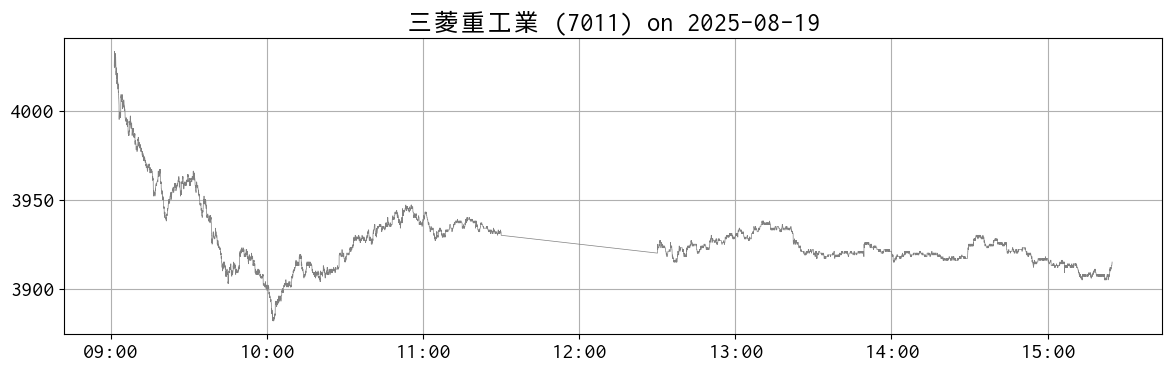

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df_tick["Price"], color="gray", linewidth=0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.grid()

ax.set_title(f"{name} ({code}) on {df_tick.index[0].strftime('%Y-%m-%d')}")

plt.tight_layout()
#plt.savefig(f"screenshots/tick_{code}_{date_str}.png")
plt.show()

## 学習曲線

In [5]:
path_csv = "data/training_history_7011_20250819_20250918_2.csv"
csv_file = str(pathlib.Path(path_csv).resolve())
df_csv = pd.read_csv(csv_file)
df_csv

,epoch,episode_reward,pnl_total,approx_kl,clipfrac
0,1,-456.4653,-17.0,0.011909,0.172071
1,2,-213.9854,22.0,0.003978,0.187878
2,3,-179.7729,127.0,0.002705,0.170059
3,4,-197.2261,43.0,0.003506,0.163592
4,5,-141.3755,132.0,0.003233,0.164019
...,...,...,...,...,...
195,196,-107.2700,163.0,0.000962,0.174287
196,197,-151.0761,82.0,0.001419,0.156709
197,198,-157.4393,135.0,0.000681,0.170580
198,199,-237.1132,6.0,0.001336,0.158364


In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 10

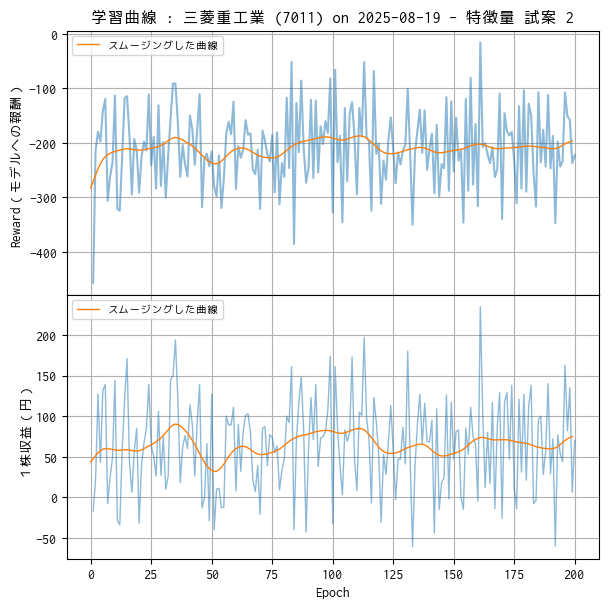

In [7]:
ax = dict()
n = 2

if n > 1:
    fig = plt.figure(figsize=(6, 6))
    gs = fig.add_gridspec(
        n,
        1,
        wspace=0.0,
        hspace=0.0,
    )
    for i, axis in enumerate(gs.subplots(sharex="col")):
        ax[i] = axis
else:
    fig, ax[0] = plt.subplots(figsize=(12, 4))

xs = np.linspace(0, len(df_csv) - 1, 200)

ax[0].set_title(f"学習曲線 : {name} ({code}) on {df_tick.index[0].strftime('%Y-%m-%d')} - 特徴量 試案 2")
ax[0].plot(df_csv["epoch"], df_csv["episode_reward"], alpha=0.5)
spl = make_smoothing_spline(df_csv["epoch"], df_csv["episode_reward"])
ax[0].plot(xs, spl(xs), linewidth=1, label="スムージングした曲線")
ax[0].grid()
ax[0].set_ylabel("Reward（モデルへの報酬）")
ax[0].legend(fontsize=8)

ax[1].plot(df_csv["epoch"], df_csv["pnl_total"], linewidth=1, alpha=0.5)
spl = make_smoothing_spline(df_csv["epoch"], df_csv["pnl_total"])
ax[1].plot(xs, spl(xs), linewidth=1, label="スムージングした曲線")
ax[1].grid()

ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("１株収益（円）")
ax[1].legend(fontsize=8)

plt.tight_layout(pad=0.4, rect=[0, 0, 1.0, 1.0])
plt.savefig(f"screenshots/learning_curve_{code}_{date_str}_20250918_2.png")
plt.show()